In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.datasets import fetch_mldata

In [264]:
mnist = pd.read_csv('mnist_train.csv')

In [265]:
mnist.rename({'5':'label'},axis=1,inplace=True)
# mnist.head(10)

In [266]:
y = mnist['label']
x = mnist.drop('label', axis=1)

In [219]:
def find_most_uncertain(model, X, n):
    probs = model.predict_proba(X)
    prob_maxs = []
    for i in range(0,len(probs)):
        prob_maxs.append((i,max(probs[i])))
    
    prob_maxs.sort(key = lambda x: x[1])
    return [x[0] for x in prob_maxs[:n]]

def sample_df_updates(X,y,n_sample):
    sample_indices = np.random.choice(len(X),n_sample, replace=False)
    X_sample = X.iloc[sample_indices]
    y_sample = y.iloc[sample_indices]
    X.drop(X.index[sample_indices],inplace=True)
    y.drop(y.index[sample_indices],inplace=True)

    return X_sample, y_sample, X, y



In [263]:
def mlp_active_random(X,y,n_start,n_step,n_test):
    X_test,y_test,x,y = sample_df_updates(X,y,n_test)
    mlp = MLPClassifier(hidden_layer_sizes=(300,300))
    X_sample, y_sample, X, y = sample_df_updates(X,y,n_start)
    mlp.fit(X_sample,y_sample)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_pred,y_test)
    sample_count = n_start
    sample_count_list = [sample_count]
    accuracies = [accuracy]
    searching = True
    
    while searching == True:
        mlp = MLPClassifier(hidden_layer_sizes=(300,300),warm_start=True)
        X_temp, y_temp, X, y = sample_df_updates(X,y,n_step)
        X_sample = pd.concat([X_sample,X_temp])
        y_sample = pd.concat([y_sample,y_temp])
        mlp.fit(X_sample,y_sample)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_pred,y_test)
        sample_count += n_step
        accuracies.append(accuracy)
        sample_count_list.append(sample_count)
        if accuracy >.9:
            searching = False
        
    print(f'Final samples : {sample_count}')
    print(f'Final accuracy : {accuracy}')
    plt.plot(sample_count_list,accuracies)

Final samples : 3000
Final accuracy : 0.90175


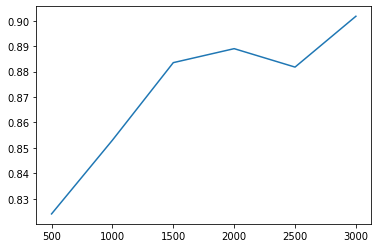

In [267]:
mlp_active_prob(x,y,500,500,4000)

In [17]:
svc.predict(x[5000:5001])

array([7])

In [18]:
y.loc[5000]

3

In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(300,300),)
mlp.fit(x[:1000],y[:1000])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [49]:
y_pred = mlp.predict(x)
print(accuracy_score(y,y_pred))

0.837930632177203


In [27]:
mnist_test = pd.read_csv('mnist_test.csv')
mnist_test.rename({'7':'label'},axis=1,inplace=True)
test_pred = mlp.predict(mnist_test.drop('label',axis=1))
accuracy_score(mnist_test['label'],test_pred)

0.9731973197319732

In [58]:
probs = mlp.predict_proba(x[6000:6010])

In [59]:
for set_ in probs:
    print(max(set_))

1.0
1.0
1.0
0.9999988480328849
0.9999999999999998
0.6973130610582168
0.9999999999997746
1.0
1.0
0.9999993035756932


In [55]:
for prob in probs[0]:
    print(prob)

9.63164644900617e-82
1.0
3.084986421018088e-38
5.619757387326777e-50
1.1975441376348185e-59
5.297694258077202e-37
3.9463097329598e-66
2.990727935990592e-65
6.623394843310655e-44
1.8803667918308338e-37


In [106]:
x.loc[indexes]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
X_test = x[:100].reset_index()
y_test = y[:100].reset_index()

In [127]:
#indexes = np.random.choice(100, 25, replace=False)
X_test,y_test,x,y = sample_df_updates(X_test,y_test,25)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  del sys.path[0]


KeyError: '[62 44 21 83 68] not found in axis'

In [217]:
X_test = x[:100].reset_index()
y_test = y[:100].reset_index()
sample_indices = np.random.choice(len(X_test),25, replace=False)
X_sample = X_test.iloc[sample_indices]
y_sample = y_test.iloc[sample_indices]
X_test.drop(sample_indices,inplace=True)
y_test.drop(sample_indices,inplace=True)


In [218]:
sample_indices = np.random.choice(len(X_test),25, replace=False)
X_sample = X_test.iloc[sample_indices]
# # y_sample = y_test.loc[sample_indices].reset_index()
X_test.drop(X_test.index[sample_indices],inplace=True)
# y_test.drop(sample_indices,inplace=True)
# X_test.reset_index(inplace=True)
# y_test.reset_index(inplace=True)

In [216]:
X_test.index[sample_indices]

Int64Index([62, 41, 91, 47, 53, 31,  8, 28, 73, 97, 75, 81, 84, 45, 35, 20, 54,
            66, 77, 67, 51, 24, 79, 78, 21],
           dtype='int64')

In [210]:
X_test.iloc[2]

index    5
0        0
0.1      0
0.2      0
0.3      0
0.4      0
0.5      0
0.6      0
0.7      0
0.8      0
0.9      0
0.10     0
0.11     0
0.12     0
0.13     0
0.14     0
0.15     0
0.16     0
0.17     0
0.18     0
0.19     0
0.20     0
0.21     0
0.22     0
0.23     0
0.24     0
0.25     0
0.26     0
0.27     0
0.28     0
        ..
0.588    0
0.589    0
0.590    0
0.591    0
0.592    0
0.593    0
0.594    0
0.595    0
0.596    0
0.597    0
0.598    0
0.599    0
0.600    0
0.601    0
0.602    0
0.603    0
0.604    0
0.605    0
0.606    0
0.607    0
0.608    0
0.609    0
0.610    0
0.611    0
0.612    0
0.613    0
0.614    0
0.615    0
0.616    0
0.617    0
Name: 4, Length: 785, dtype: int64

In [198]:
X_sample.reset_index()

ValueError: cannot insert level_0, already exists